In [2]:
# IMPORTAR LIBRERÍAS
import pandas as pd, os, numpy as np, matplotlib.pylab as plt, seaborn as sns, scipy
plt.style.use('ggplot')

pd.set_option('display.max_columns',550) # Cargar todas las columnas

In [3]:
# PARTE 0: CARGAR LOS DATOS

ruta = r'D:\msc\4_analisis_datos\practica_3\practica3_rstudio\data'

# Crear el data frame
df = pd.read_excel(os.path.join(ruta,'barrio_clean_excel.xlsx'))
#df = pd.read_csv('massachusetts.csv')
print(f'Número de filas del Data frame: {df.shape[0]} | Número de columnas del Data frame: {df.shape[1]}') # Dimensionalidad del df
df

Número de filas del Data frame: 73 | Número de columnas del Data frame: 49


,FID,NOM,C_BARRIO,POP,DENS_HAB_HA,DENS_NET_HAB_HA,AREA_HA,AREA_HA_RESI,POR_MAS65,PORC_MAS65_SOLA,TASA_NAT,TASA_MORT_TOT,TASA_MORT_H,TASA_MORT_M,ESP_VIDA,TASA_IMMI_1000,I_RENTA_FAM,RENTA_TRIBUTA,PRECIO_ALQ,VALOR_CAT,EDAD_MED_VIV,INST_DEPOR,BIBLIO_MUSEOS,INC_VIOLENCIA,INC_GEN_SEX,TOTAL_VEHICULOS,MEDIA_NO2,NUM_FARMACIAS,HOSPITAL_CAP,CENTROS_BIENESTAR,COVID_ACUM,df_activ_econ_activitats_immobiliaries,df_activ_econ_altres,df_activ_econ_automocio,df_activ_econ_ensenyament,df_activ_econ_equipament_personal,df_activ_econ_equipaments_culturals_i_recreatius,df_activ_econ_finances_i_assegurances,df_activ_econ_oci_i_cultura,df_activ_econ_parament_de_la_llar,df_activ_econ_quotidia_alimentari,df_activ_econ_quotidia_no_alimentari,df_activ_econ_reparacions_electrodomestics_i_automobils,df_activ_econ_restaurants_bars_i_hotels_inclos_hostals_pensions_i_fondes,df_activ_econ_sanitat_i_assistencia,df_activ_econ_manteniment_neteja_i_produccio,df_paro_pop_16_a_64,df_paro_suma_paro,df_paro_max_peso_paro
0,11,el Raval,1,48263,430,955,110.0,49.6,11.7,31.8,9.287,1005.4,1415.1,724.8,81.3,125.9,71.2,9190,834,9.113090e+07,69.0,8,453,6766,169.0,7197,44.402810,33,3,9,4437,10,713,1,52,191,62,36,133,84,484,81,9,540,14,0,36405,8467,9.1
1,12,el Barri Gòtic,2,21715,228,546,81.6,34.1,12.8,30.2,7.531,1004.5,1407.4,705.3,81.8,253.6,106.1,12169,1036,2.238257e+08,91.7,12,287,4617,79.0,5841,46.508876,23,1,0,927,3,521,1,17,443,63,30,54,46,106,74,0,513,4,0,15462,5550,5.8
2,13,la Barceloneta,3,15112,136,1097,109.5,13.5,17.8,32.7,5.563,1090.5,1486.2,812.4,80.7,130.4,79.6,11496,868,8.604504e+07,82.9,20,180,1881,63.0,3518,46.386555,9,3,1,882,10,145,0,17,25,9,7,17,8,101,20,5,200,14,0,11337,8317,8.9
3,14,"Sant Pere, Santa Caterina i la Ribera",4,23241,204,697,111.0,32.4,14.2,34.5,6.548,911.4,1229.1,711.7,82.8,132.8,99.4,12692,954,1.113849e+08,78.0,6,316,2879,62.0,4622,46.339623,23,1,3,1318,17,539,1,39,284,56,17,22,52,210,56,2,394,12,0,17710,7367,7.8
4,15,el Fort Pienc,5,33369,348,962,92.9,33.6,21.3,25.2,8.364,807.6,1021.4,671.2,84.5,95.1,106.5,16308,1003,7.708987e+07,61.1,24,229,1403,26.0,7930,47.089552,20,2,0,2132,14,484,18,29,58,22,16,34,72,136,53,33,209,23,1,21844,5342,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,79,Diagonal Mar i el Front Marítim del Poblenou,69,13526,112,563,120.3,24.0,15.0,20.8,11.714,731.7,623.9,623.9,85.6,52.9,150.1,16823,1172,2.070463e+08,10.9,10,20,552,26.0,2618,41.526718,8,1,1,639,5,124,0,18,74,6,9,11,7,36,22,3,127,12,2,8858,6850,7.2
69,80,el Besòs i el Maresme,70,25501,208,878,118.5,28.1,17.7,26.4,10.474,803.2,602.2,602.2,84.3,110.5,60.4,9896,752,3.519106e+07,45.8,14,86,1031,43.0,5082,40.316092,14,2,0,1818,5,159,1,15,12,7,8,7,11,106,24,7,86,12,1,16577,8350,8.8
70,81,Provençals del Poblenou,71,21523,193,1371,108.6,15.3,17.9,22.8,9.935,774.7,599.5,599.5,85.2,51.9,102.3,13787,958,5.546038e+07,35.9,4,24,618,31.0,5220,42.447917,13,1,0,1449,6,224,5,23,8,4,9,11,13,34,24,21,90,18,3,14217,6525,6.7
71,82,Sant Martí de Provençals,72,26168,355,1113,73.4,23.4,25.5,25.2,5.958,761.1,564.1,564.1,85.0,45.7,67.4,13457,832,3.261181e+07,39.8,30,38,483,36.0,6181,41.230769,16,2,1,1429,15,230,3,36,30,14,9,14,24,112,32,14,101,27,12,16219,7933,8.1


In [4]:
# ESTRUCTURA DEL DF
#print(df.info)
print(df.dtypes.to_string()) # Tipo de dato

print(df.columns) # Columnas

print(f'Descripción:\n{df.describe()}') # Describir los datos

print(f'Valores nulos:\n{df.isna().sum()}') # Identificar nulos por columnas

FID                                                                           int64
NOM                                                                          object
C_BARRIO                                                                      int64
POP                                                                           int64
DENS_HAB_HA                                                                   int64
DENS_NET_HAB_HA                                                               int64
AREA_HA                                                                     float64
AREA_HA_RESI                                                                float64
POR_MAS65                                                                   float64
PORC_MAS65_SOLA                                                             float64
TASA_NAT                                                                    float64
TASA_MORT_TOT                                                               

In [5]:
# EXCLUIR PARA ANÁLISIS

excluir = ['FID', 'NOM', 'C_BARRIO']

# Eliminar columnas de lista
df = df.drop(columns=excluir)
for i,a in enumerate(df.columns,start=1): print(f"{i}-{a}")
#print(df.columns)

# Validar nueva extensión
df.shape


1-POP
2-DENS_HAB_HA
3-DENS_NET_HAB_HA
4-AREA_HA
5-AREA_HA_RESI
6-POR_MAS65
7-PORC_MAS65_SOLA
8-TASA_NAT
9-TASA_MORT_TOT
10-TASA_MORT_H
11-TASA_MORT_M
12-ESP_VIDA
13-TASA_IMMI_1000
14-I_RENTA_FAM
15-RENTA_TRIBUTA
16-PRECIO_ALQ
17-VALOR_CAT
18-EDAD_MED_VIV
19-INST_DEPOR
20-BIBLIO_MUSEOS
21-INC_VIOLENCIA
22-INC_GEN_SEX
23-TOTAL_VEHICULOS
24-MEDIA_NO2
25-NUM_FARMACIAS
26-HOSPITAL_CAP
27-CENTROS_BIENESTAR
28-COVID_ACUM
29-df_activ_econ_activitats_immobiliaries
30-df_activ_econ_altres
31-df_activ_econ_automocio
32-df_activ_econ_ensenyament
33-df_activ_econ_equipament_personal
34-df_activ_econ_equipaments_culturals_i_recreatius
35-df_activ_econ_finances_i_assegurances
36-df_activ_econ_oci_i_cultura
37-df_activ_econ_parament_de_la_llar
38-df_activ_econ_quotidia_alimentari
39-df_activ_econ_quotidia_no_alimentari
40-df_activ_econ_reparacions_electrodomestics_i_automobils
41-df_activ_econ_restaurants_bars_i_hotels_inclos_hostals_pensions_i_fondes
42-df_activ_econ_sanitat_i_assistencia
43-df_activ

(73, 46)

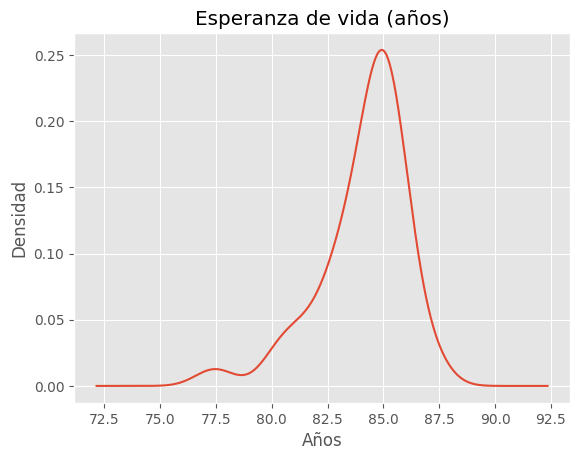

In [6]:
# Contar valores
#print(df['ESP_VIDA'].value_counts())

# Análisis univariado con estimación de la densidad del núcleo
#print(df['ESP_VIDA'].describe())

ax = df['ESP_VIDA'].plot(kind='kde',
                          title='Esperanza de vida (años)')
ax.set_xlabel('Años')
ax.set_ylabel('Densidad')
plt.show()

In [7]:
# Tasa de hospitles x 10mil hab

df['hospitales_10mil_hab'] = (df['HOSPITAL_CAP'] / df['POP']) * 10000
df.head(5)


,POP,DENS_HAB_HA,DENS_NET_HAB_HA,AREA_HA,AREA_HA_RESI,POR_MAS65,PORC_MAS65_SOLA,TASA_NAT,TASA_MORT_TOT,TASA_MORT_H,TASA_MORT_M,ESP_VIDA,TASA_IMMI_1000,I_RENTA_FAM,RENTA_TRIBUTA,PRECIO_ALQ,VALOR_CAT,EDAD_MED_VIV,INST_DEPOR,BIBLIO_MUSEOS,INC_VIOLENCIA,INC_GEN_SEX,TOTAL_VEHICULOS,MEDIA_NO2,NUM_FARMACIAS,HOSPITAL_CAP,CENTROS_BIENESTAR,COVID_ACUM,df_activ_econ_activitats_immobiliaries,df_activ_econ_altres,df_activ_econ_automocio,df_activ_econ_ensenyament,df_activ_econ_equipament_personal,df_activ_econ_equipaments_culturals_i_recreatius,df_activ_econ_finances_i_assegurances,df_activ_econ_oci_i_cultura,df_activ_econ_parament_de_la_llar,df_activ_econ_quotidia_alimentari,df_activ_econ_quotidia_no_alimentari,df_activ_econ_reparacions_electrodomestics_i_automobils,df_activ_econ_restaurants_bars_i_hotels_inclos_hostals_pensions_i_fondes,df_activ_econ_sanitat_i_assistencia,df_activ_econ_manteniment_neteja_i_produccio,df_paro_pop_16_a_64,df_paro_suma_paro,df_paro_max_peso_paro,hospitales_10mil_hab
0,48263,430,955,110.0,49.6,11.7,31.8,9.287,1005.4,1415.1,724.8,81.3,125.9,71.2,9190,834,9.113090e+07,69.0,8,453,6766,169.0,7197,44.402810,33,3,9,4437,10,713,1,52,191,62,36,133,84,484,81,9,540,14,0,36405,8467,9.1,0.621594
1,21715,228,546,81.6,34.1,12.8,30.2,7.531,1004.5,1407.4,705.3,81.8,253.6,106.1,12169,1036,2.238257e+08,91.7,12,287,4617,79.0,5841,46.508876,23,1,0,927,3,521,1,17,443,63,30,54,46,106,74,0,513,4,0,15462,5550,5.8,0.460511
2,15112,136,1097,109.5,13.5,17.8,32.7,5.563,1090.5,1486.2,812.4,80.7,130.4,79.6,11496,868,8.604504e+07,82.9,20,180,1881,63.0,3518,46.386555,9,3,1,882,10,145,0,17,25,9,7,17,8,101,20,5,200,14,0,11337,8317,8.9,1.985177
3,23241,204,697,111.0,32.4,14.2,34.5,6.548,911.4,1229.1,711.7,82.8,132.8,99.4,12692,954,1.113849e+08,78.0,6,316,2879,62.0,4622,46.339623,23,1,3,1318,17,539,1,39,284,56,17,22,52,210,56,2,394,12,0,17710,7367,7.8,0.430274
4,33369,348,962,92.9,33.6,21.3,25.2,8.364,807.6,1021.4,671.2,84.5,95.1,106.5,16308,1003,7.708987e+07,61.1,24,229,1403,26.0,7930,47.089552,20,2,0,2132,14,484,18,29,58,22,16,34,72,136,53,33,209,23,1,21844,5342,5.5,0.599359


In [8]:
#print(df.columns) # Columnas

# c. Matriz de correlaciones

df_corr1=df.dropna().corr() # Importante retirar los nulos
#print(df_corr1.to_string())
df_corr1

,POP,DENS_HAB_HA,DENS_NET_HAB_HA,AREA_HA,AREA_HA_RESI,POR_MAS65,PORC_MAS65_SOLA,TASA_NAT,TASA_MORT_TOT,TASA_MORT_H,TASA_MORT_M,ESP_VIDA,TASA_IMMI_1000,I_RENTA_FAM,RENTA_TRIBUTA,PRECIO_ALQ,VALOR_CAT,EDAD_MED_VIV,INST_DEPOR,BIBLIO_MUSEOS,INC_VIOLENCIA,INC_GEN_SEX,TOTAL_VEHICULOS,MEDIA_NO2,NUM_FARMACIAS,HOSPITAL_CAP,CENTROS_BIENESTAR,COVID_ACUM,df_activ_econ_activitats_immobiliaries,df_activ_econ_altres,df_activ_econ_automocio,df_activ_econ_ensenyament,df_activ_econ_equipament_personal,df_activ_econ_equipaments_culturals_i_recreatius,df_activ_econ_finances_i_assegurances,df_activ_econ_oci_i_cultura,df_activ_econ_parament_de_la_llar,df_activ_econ_quotidia_alimentari,df_activ_econ_quotidia_no_alimentari,df_activ_econ_reparacions_electrodomestics_i_automobils,df_activ_econ_restaurants_bars_i_hotels_inclos_hostals_pensions_i_fondes,df_activ_econ_sanitat_i_assistencia,df_activ_econ_manteniment_neteja_i_produccio,df_paro_pop_16_a_64,df_paro_suma_paro,df_paro_max_peso_paro,hospitales_10mil_hab
POP,1.000000,0.546773,0.365731,-0.104664,0.385951,0.100821,0.273866,-0.021944,-0.399658,-0.320037,-0.328142,0.406786,0.217787,0.219471,0.283908,0.297607,-0.071368,0.344109,0.407801,0.357108,0.585110,0.613394,0.920671,0.504340,0.892854,0.531148,0.376440,0.955741,0.826138,0.901773,0.597295,0.805840,0.568583,0.633845,0.777287,0.766361,0.798591,0.865393,0.858372,0.800762,0.735338,0.764310,0.643196,0.994581,-0.347045,-0.351333,-0.121481
DENS_HAB_HA,0.546773,1.000000,0.649984,-0.423795,-0.087719,0.235107,0.304742,-0.108765,-0.425542,-0.231561,-0.413856,0.415439,0.119269,-0.149377,-0.050021,-0.026353,-0.281436,0.330099,0.168008,-0.081549,0.252750,0.411941,0.400262,0.291470,0.392302,0.035396,0.245878,0.585741,0.412211,0.415260,0.246926,0.274342,0.188468,0.170186,0.322587,0.389992,0.417367,0.489011,0.409796,0.531946,0.288539,0.306475,0.363732,0.542204,-0.131284,-0.137060,-0.304731
DENS_NET_HAB_HA,0.365731,0.649984,1.000000,-0.466197,-0.402357,0.117639,0.308101,-0.010072,-0.320259,-0.240174,-0.418883,0.283470,0.172157,-0.363416,-0.323750,-0.166951,-0.408003,0.128588,0.244451,0.068791,0.198368,0.443746,0.145944,0.333208,0.145392,-0.088246,0.155814,0.447284,0.108096,0.161705,0.085598,0.032804,-0.065139,0.065890,0.041813,0.132132,0.105114,0.260982,0.152360,0.330253,0.114809,-0.021046,0.260745,0.379539,0.117298,0.113549,-0.292008
AREA_HA,-0.104664,-0.423795,-0.466197,1.000000,0.554693,-0.180443,0.035698,0.275880,0.365782,0.160064,0.450325,-0.178041,-0.089240,0.115599,0.091492,-0.079297,0.724526,-0.149995,-0.029686,0.114062,-0.040304,-0.134800,0.013369,-0.176694,-0.073168,0.027703,-0.102999,-0.123205,-0.038229,-0.011359,0.104223,-0.019700,-0.021633,0.022764,-0.023085,-0.042160,-0.042806,-0.082964,-0.057012,0.003476,-0.027159,-0.029351,-0.036410,-0.099735,-0.019259,-0.020919,0.101087
AREA_HA_RESI,0.385951,-0.087719,-0.402357,0.554693,1.000000,-0.089235,-0.088390,0.021021,0.037388,-0.038822,0.163655,0.067962,-0.029929,0.547997,0.536572,0.508570,0.186101,0.103767,0.078868,0.223084,0.228402,0.088079,0.496655,-0.027365,0.454860,0.395493,0.109237,0.303517,0.474184,0.448014,0.301248,0.494368,0.399109,0.354006,0.475636,0.386430,0.446969,0.372413,0.436981,0.269501,0.382346,0.492926,0.222409,0.372960,-0.534834,-0.531818,0.112633
POR_MAS65,0.100821,0.235107,0.117639,-0.180443,-0.089235,1.000000,-0.093189,-0.449588,-0.370454,-0.254817,-0.256791,0.416009,-0.435308,-0.004243,0.253902,0.017737,-0.169517,-0.031618,-0.006977,-0.358731,-0.373943,-0.257271,0.164484,-0.142096,0.051706,0.153685,-0.141273,0.074709,0.118669,-0.033078,0.123448,0.079026,-0.186170,-0.268048,0.050840,-0.116682,0.018182,-0.074268,-0.010916,0.240901,-0.179525,0.189177,0.255942,0.033190,-0.125825,-0.139784,0.023441
PORC_MAS65_SOLA,0.273866,0.304742,0.308101,0.035698,-0.088390,-0.093189,1.000000,0.140034,0.028654,0.239850,-0.120164,-0.056250,0.474307,-0.133569,-0.188228,-0.188626,0.216061,0.510829,0.069224,0.387455,0.505099,0.471575,0.204656,0.390185,0.293652,0.059524,0.108199,0.279019,0.248555,0.368965,0.117

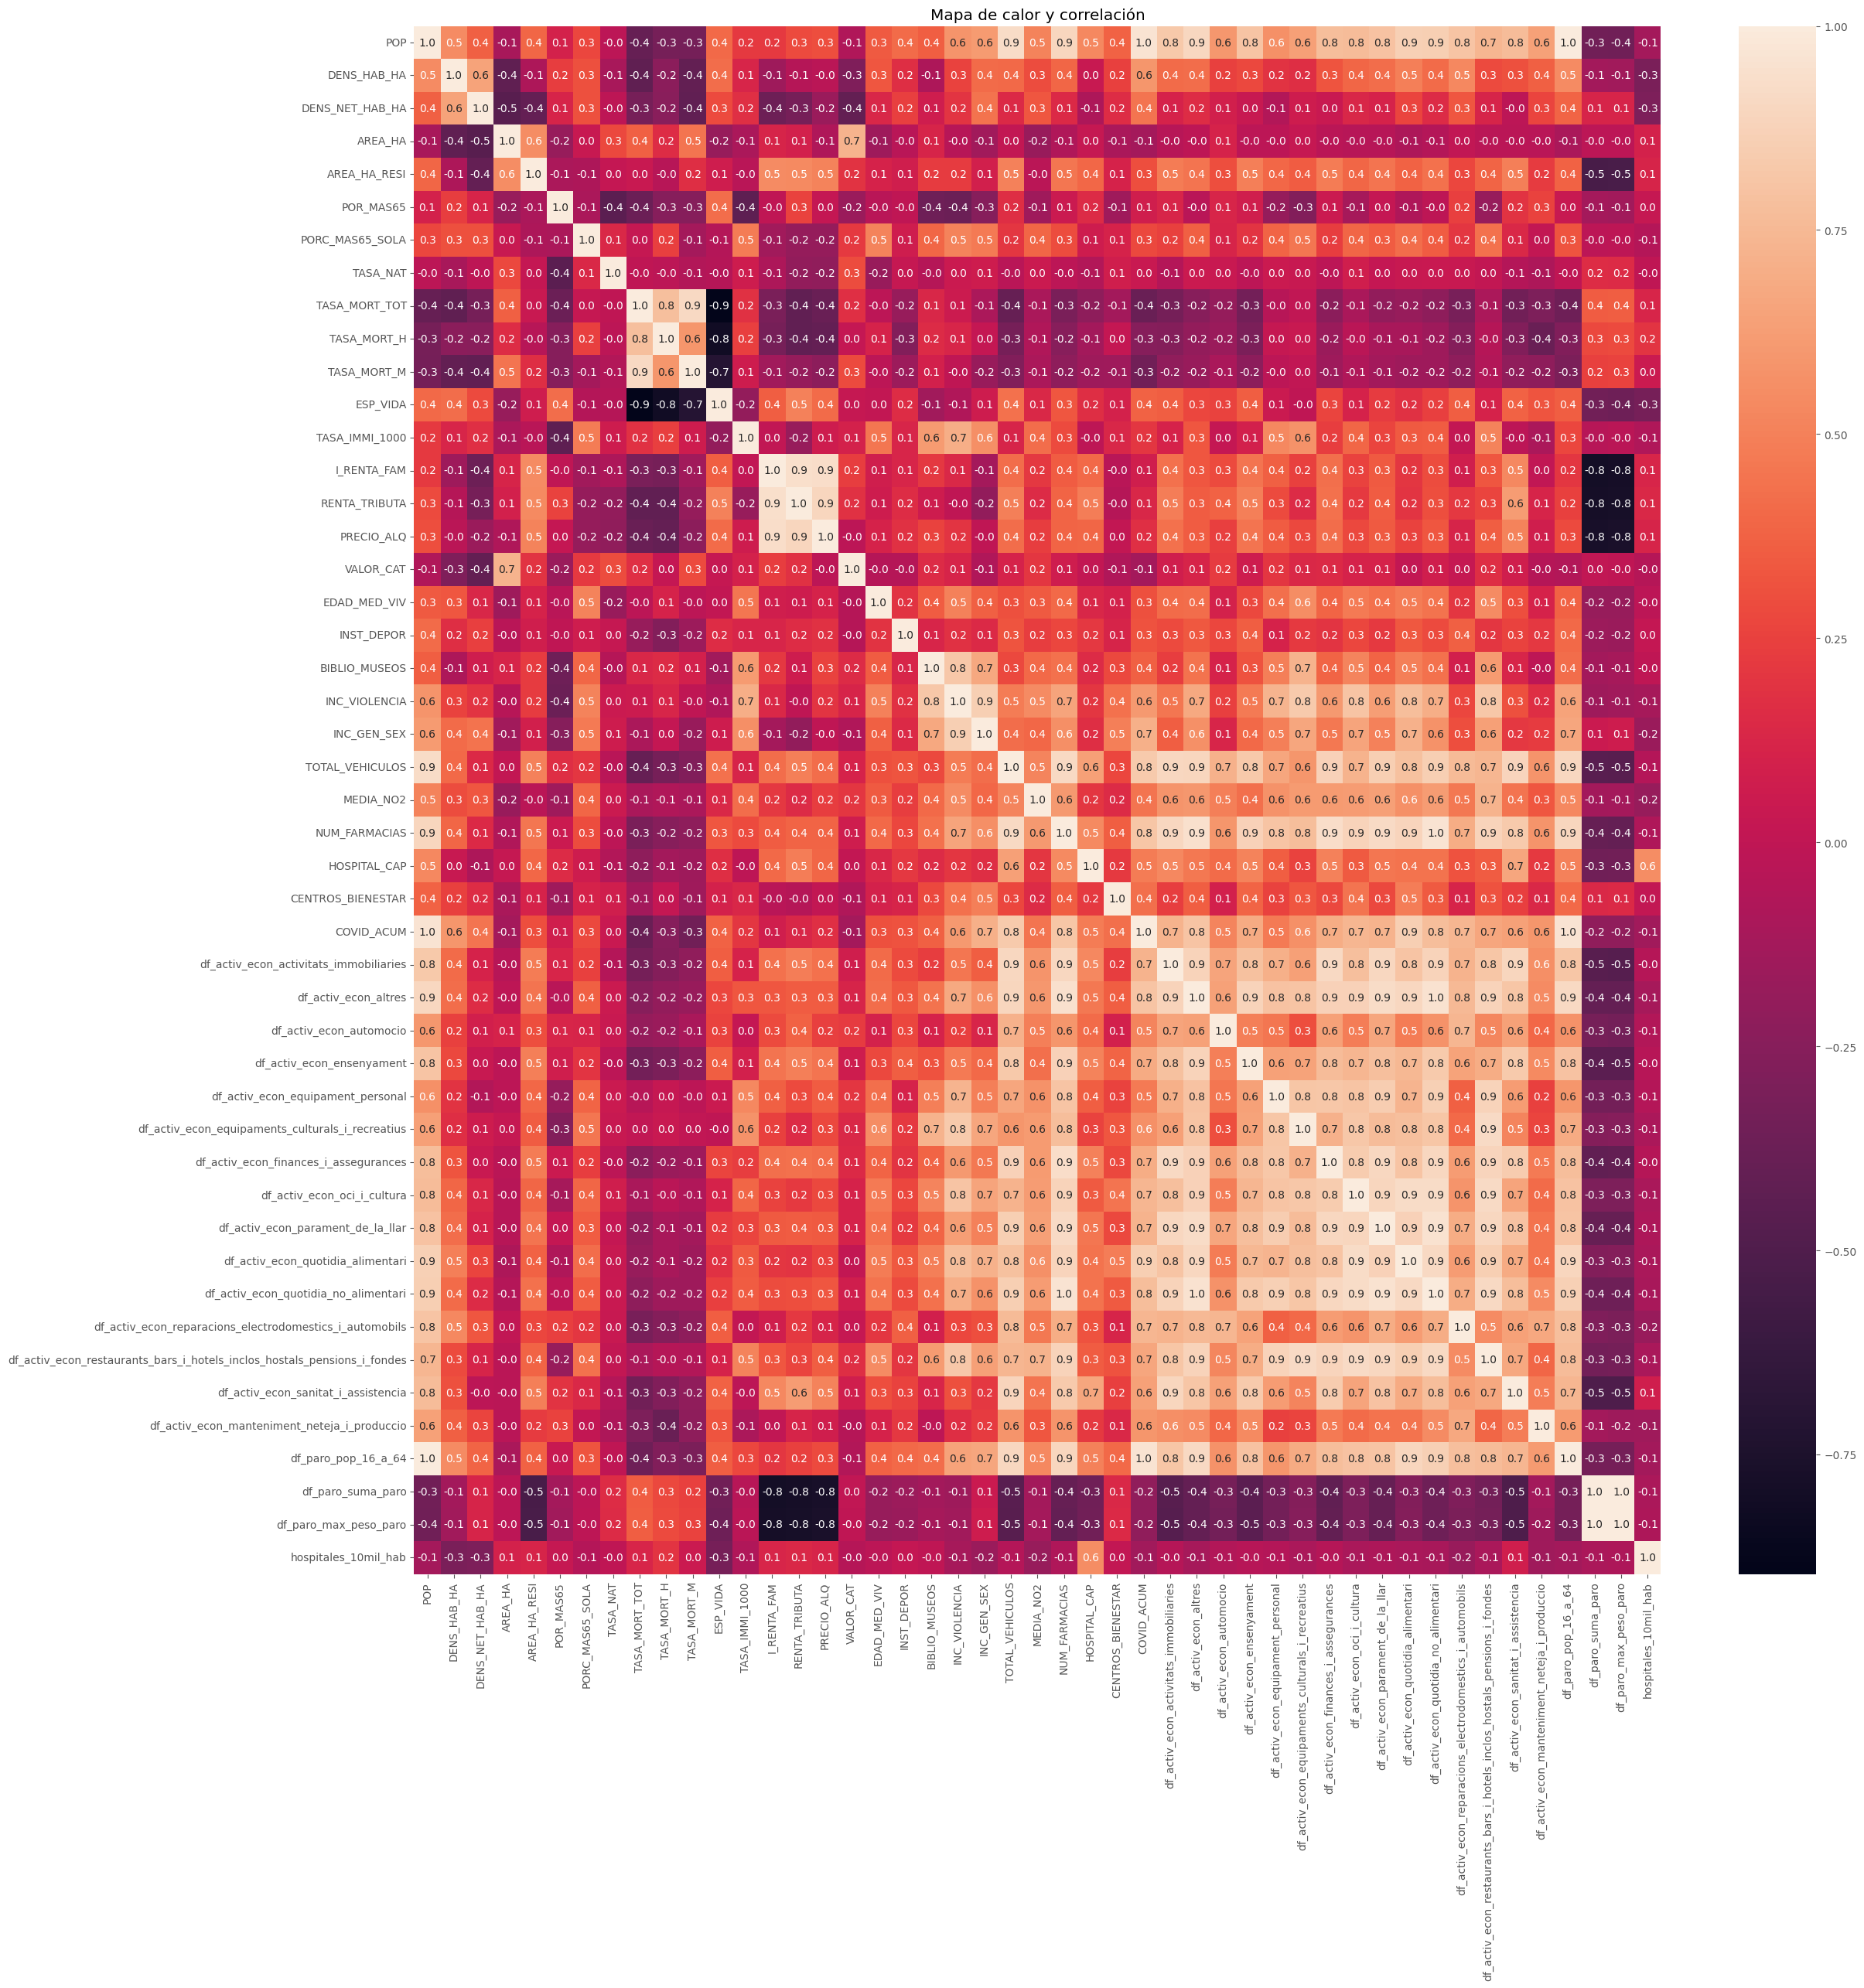

In [9]:
# Mapas de calor

# Establecer el tamaño de la figura
plt.figure(figsize=(26, 26))  # 10x10 pulgadas (1000x1000 píxeles)
#plt.figure(figsize=(17, 17))  # 10x10 pulgadas (1000x1000 píxeles)

# Crear el mapa de calor
sns.heatmap(df_corr1, annot=True, fmt=".1f").set(title='Mapa de calor y correlación') # Con valores
#sns.heatmap(df_corr1).set(title='Mapa de calor y correlación') # Sin valores

# Mostrar el gráfico
plt.show() 

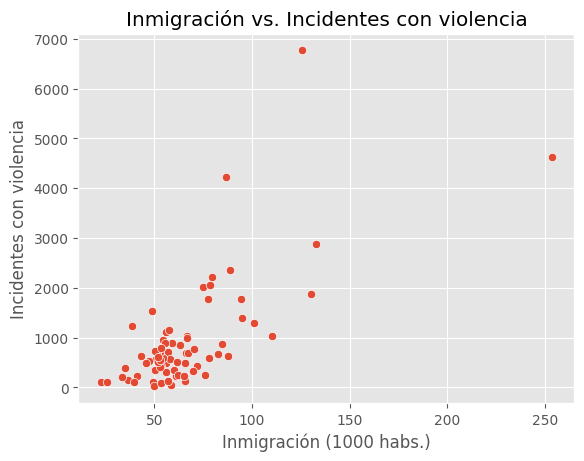

In [16]:
# Ideas a comparar

# Población vs. acumulación covid [POP, COVID_ACUM] | Correlación +0.96
# Esperanza vida vs. Tasa mortalidad total [ESP_VIDA, TASA_MORT_TOT] | Correlación -0.9
# Precio alquiler vs. Ingreso renta familiar / Renta Tributaria [PRECIO_ALQ, I_RENTA_FAM, RENTA_TRIBUTA] | Correlación +0.9
# Valor catastral vs. Area hectáreas [VALOR_CAT,AREA_HA] | Correlación +0.7
# Máximo peso paro vs. Precio alquiler [PRECIO_ALQ, RENTA_TRIBUTA, I_RENTA_FAM, df_paro_max_peso_paro] | Correlación -0.8
# Incidentes con violencia vs. Tasa de inmigración x 1000 [INC_VIOLENCIA,TASA_IMMI_1000] | Correlación +0.7

# Gráfico de dispersión (Scatterplot con Seaborn)

""" sns.scatterplot(x='I_RENTA_FAM',
        y='df_paro_max_peso_paro',
        #hue = 'Year_Introduced',
        data=df).set(title='Peso del paro COVID vs. Índice renta familiar')
plt.xlabel('Precio alquiler')
plt.ylabel('Peso paro')
plt.show() """

sns.scatterplot(x='TASA_IMMI_1000',
        y='INC_VIOLENCIA',
        #hue = 'Year_Introduced',
        data=df).set(title='Inmigración vs. Incidentes con violencia')
plt.xlabel('Inmigración (1000 habs.)')
plt.ylabel('Incidentes con violencia')
plt.show()

In [11]:
# c. Matriz de correlaciones

df_corr2=df[['POP', 'ESP_VIDA', 'TASA_MORT_TOT', 'RENTA_TRIBUTA', 'I_RENTA_FAM',
'PRECIO_ALQ', 'VALOR_CAT','AREA_HA', 'COVID_ACUM', 'df_paro_max_peso_paro',
'INC_VIOLENCIA','TASA_IMMI_1000']].dropna().corr() # Importante retirar los nulos
#print(df_corr1.to_string())
df_corr2

,POP,ESP_VIDA,TASA_MORT_TOT,RENTA_TRIBUTA,I_RENTA_FAM,PRECIO_ALQ,VALOR_CAT,AREA_HA,COVID_ACUM,df_paro_max_peso_paro,INC_VIOLENCIA,TASA_IMMI_1000
POP,1.000000,0.411369,-0.416552,0.286852,0.216090,0.313342,-0.059465,-0.090458,0.957135,-0.306222,0.590445,0.225162
ESP_VIDA,0.411369,1.000000,-0.893472,0.499145,0.358984,0.411852,0.027225,-0.172528,0.376035,-0.338559,-0.063313,-0.191155
TASA_MORT_TOT,-0.416552,-0.893472,1.000000,-0.419559,-0.300224,-0.392264,0.160809,0.349128,-0.398769,0.317213,0.040620,0.171046
RENTA_TRIBUTA,0.286852,0.499145,-0.419559,1.000000,0.934539,0.890970,0.185878,0.094205,0.136039,-0.759766,0.002127,-0.176480
I_RENTA_FAM,0.216090,0.358984,-0.300224,0.934539,1.000000,0.924205,0.235769,0.115353,0.074673,-0.772807,0.133124,0.001953
PRECIO_ALQ,0.313342,0.411852,-0.392264,0.890970,0.924205,1.000000,-0.008594,-0.069448,0.189771,-0.721650,0.203084,0.068623
VALOR_CAT,-0.059465,0.027225,0.160809,0.185878,0.235769,-0.008594,1.000000,0.725647,-0.109006,0.010600,0.122158,0.101140
AREA_HA,-0.090458,-0.172528,0.349128,0.094205,0.115353,-0.069448,0.725647,1.000000,-0.108567,-0.007388,-0.033200,-0.084426
COVID_ACUM,0.957135,0.376035,-0.398769,0.136039,0.074673,0.189771,-0.109006,-0.108567,1.000000,-0.172201,0.609772,0.211638
df_paro_max_peso_paro,-0.306222,-0.338559,0.317213,-0.759766,-0.772807,-0.721650,0.010600,-0.007388,-0.172201,1.000000,-0.115567,-0.016024


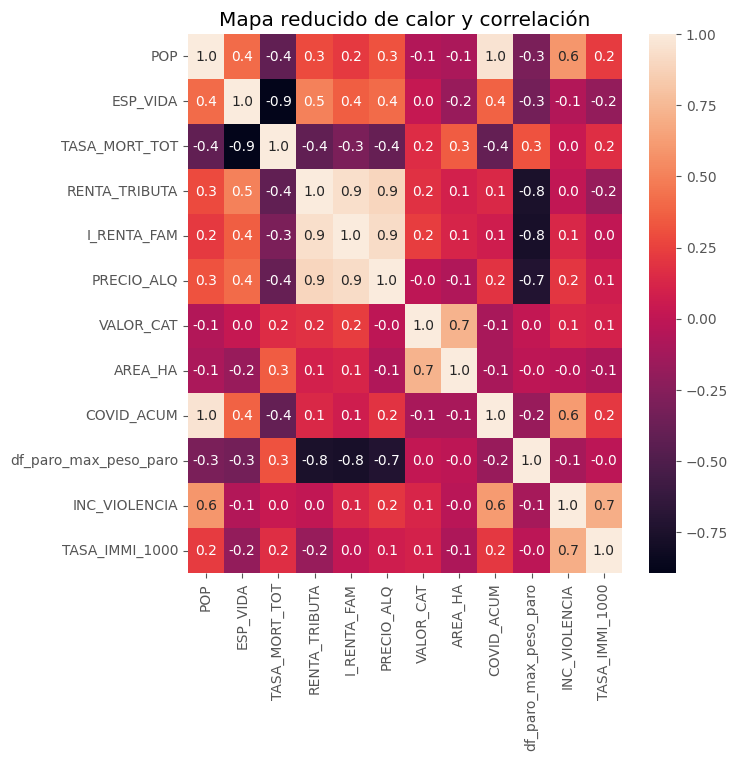

In [12]:
# Mapas de calor

# Establecer el tamaño de la figura
#plt.figure(figsize=(26, 26))  # 10x10 pulgadas (1000x1000 píxeles)
plt.figure(figsize=(7, 7))  # 10x10 pulgadas (1000x1000 píxeles)

# Crear el mapa de calor
sns.heatmap(df_corr2, annot=True, fmt=".1f").set(title='Mapa reducido de calor y correlación') # Con valores
#sns.heatmap(df_corr1).set(title='Mapa de calor y correlación') # Sin valores

# Mostrar el gráfico
plt.show()